In [66]:
# special IPython command to prepare the notebook for matplotlib and other libraries
%matplotlib inline 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import seaborn as sns

In [67]:
def retrieve_data():
    engine =  create_engine('sqlite:///../data/database/happycows.db')
    with engine.connect() as con:
        milk = pd.read_sql_table('milk_volume', con)
        weather = pd.read_sql_table('weather', con)
        score = pd.read_sql_table('classification', con)
        genetics = pd.read_sql_table('genetics', con)
    return milk, weather, score, genetics

def merge_data(milk, weather, score, genetics):
    milk.reset_index()
    weather.reset_index()
    score.reset_index()
    m = pd.merge(left=milk, right=weather, left_on='date', right_on='date')
    m = pd.merge(left=m, right=score, left_on='animal_id', right_on='animal_id')
    m = pd.merge(left=m, right=genetics, left_on='animal_id', right_on='animal_id')
    m = m.reset_index()
    return m

def select_features(data):
    milk_features = ['milk_weight', 'average_flow', 'max_flow']
    weather_features =  ['prcp', 'tmax', 'tmin', 'is_hot', 'is_cold', 'is_heatwave', 'is_coldwave']
    
    #score_features =  ['lactation_count', 'stature', 'strength', 'body_depth',
    #                   'dairy_form', 'rump_angle', 'rump_width', 'rear_legs_side', 'rear_legs_rear',
    #                   'locomotion', 'foot_angle', 'fore_udder', 'udder_height', 'udder_width',
    #                   'udder_cleft', 'udder_depth', 'front_teat_placement', 'rear_teat_placement',
    #                   'teat_length', 'udder_tilt', 'body_condition', 'front_end_capacity_aggregate',
    #                   'dairy_strength_aggregate', 'rump_aggregate', 'feet_and_legs_aggregate',
    #                   'udder_score_aggregate', 'final_score', 'breed_age_average', 'category']
    genetics_features = ['milk', 'ctpi']
    
    features = milk_features + weather_features + ['final_score'] + genetics_features
    
    #for col in ['category']:
    #    data[col] = data[col].astype('category')
        
    for col in ['is_hot', 'is_cold', 'is_heatwave', 'is_coldwave']:
        data[col] = data[col].astype('int')
        
    return pd.get_dummies(data[features].dropna(axis=0, how='any'))

def get_data():
    milk, weather, score, genetics = retrieve_data()
    data = merge_data(milk, weather, score, genetics)
    return select_features(data)    

In [68]:
data = get_data()
subset = data.sample(3000)

In [79]:
from sklearn import preprocessing

X_scaled = preprocessing.scale(subset)

t-SNE: 81 sec


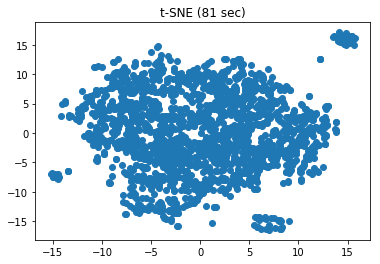

In [80]:
from time import time

n_components=3

t0 = time()
tsne = manifold.TSNE(n_components=n_components, init='pca', random_state=0)
Y = tsne.fit_transform(X_scaled)
t1 = time()
print("t-SNE: %.2g sec" % (t1 - t0))
plt.scatter(Y[:, 0], Y[:, 1], cmap=plt.cm.Spectral)
plt.title("t-SNE (%.2g sec)" % (t1 - t0))
plt.axis('tight')

plt.show()

In [81]:
subset['milk_weight'].describe()

count    2000.000000
mean       34.102350
std        14.211364
min         0.000000
25%        25.800000
50%        33.200000
75%        40.925000
max       140.400000
Name: milk_weight, dtype: float64

In [82]:
milk = subset['milk_weight']

mm = milk.mean()
ms = milk.std()

q1 = milk < (mm - ms)
q2 = ((mm - ms) <= milk) & (milk <= (mm))
q3 = ((mm) < milk) & (milk < (mm + ms))
q4 = milk >= (mm + ms)

t-SNE: 81 sec


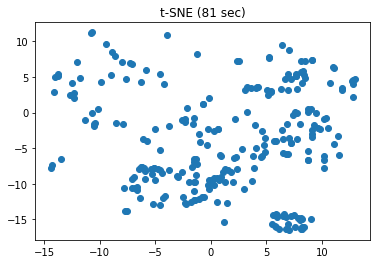

t-SNE: 81 sec


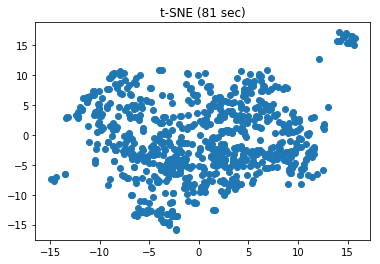

t-SNE: 81 sec


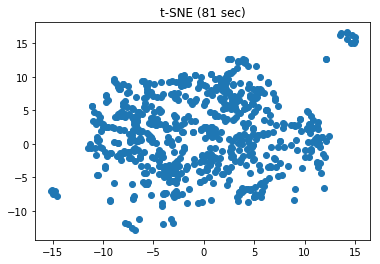

t-SNE: 81 sec


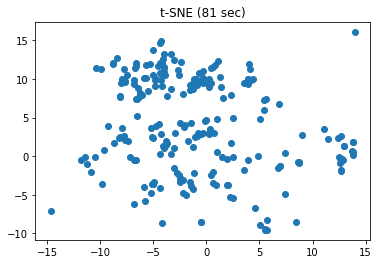

In [83]:
print("t-SNE: %.2g sec" % (t1 - t0))
plt.scatter(Y[q1][:, 0], Y[q1][:, 1], cmap=plt.cm.Spectral)
plt.title("t-SNE (%.2g sec)" % (t1 - t0))
plt.axis('tight')

plt.show()

print("t-SNE: %.2g sec" % (t1 - t0))
plt.scatter(Y[q2][:, 0], Y[q2][:, 1], cmap=plt.cm.Spectral)
plt.title("t-SNE (%.2g sec)" % (t1 - t0))
plt.axis('tight')

plt.show()

print("t-SNE: %.2g sec" % (t1 - t0))
plt.scatter(Y[q3][:, 0], Y[q3][:, 1], cmap=plt.cm.Spectral)
plt.title("t-SNE (%.2g sec)" % (t1 - t0))
plt.axis('tight')

plt.show()

print("t-SNE: %.2g sec" % (t1 - t0))
plt.scatter(Y[q4][:, 0], Y[q4][:, 1], cmap=plt.cm.Spectral)
plt.title("t-SNE (%.2g sec)" % (t1 - t0))
plt.axis('tight')

plt.show()